<a href="https://colab.research.google.com/github/mushy2003/CSinSchools/blob/main/'Project%20Week%206%2006-03-24'/SimpleLinearModelSolutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import random


# Creating the Linear Model Class

In [ ]:
class LinearModel:
  def __init__(self):
    self.m = random.randint(-1, 1) # this can be any random number
    self.c = random.randint(-1, 1) # this can be any random number

  def train(self, x_train: np.array, y_train: np.array, num_epochs=100, alpha: int = 0.001):
    for i in range(num_epochs):
      y_pred = self.m * x_train + self.c
      loss = np.sum((y_pred - y_train) ** 2)
      # Then update parameters by gradient descent
      self.m -= alpha * np.sum((y_pred - y_train) * x_train)
      self.c -= alpha * np.sum(y_pred - y_train)

    print(f"m: {self.m}, c: {self.c}") # Optionally prints out the new values of m and c

  def predict(self, x_test: np.array):
    return self.m * x_test + self.c

#Loading in our Dataset and Visualising it

In [ ]:
df = pd.read_csv('student_scores.csv')
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


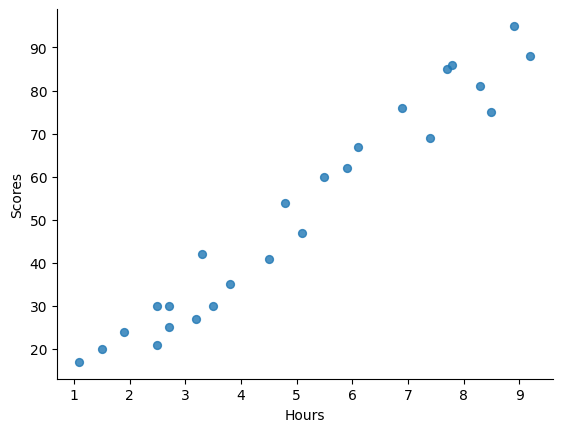

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Hours', y='Scores', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

# Splitting dataset into training and test sets

In [ ]:
train_len = int(len(df) * 0.7)
x_train, y_train, x_test, y_test = np.array(df.iloc[:train_len, 0]), np.array(df.iloc[:train_len, 1]), np.array(df.iloc[train_len:, 0]), np.array(df.iloc[train_len:, 1])
x_train, y_train, x_test, y_test

(array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
        3.3, 1.1, 8.9, 2.5]),
 array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30]),
 array([1.9, 6.1, 7.4, 2.7, 4.8, 3.8, 6.9, 7.8]),
 array([24, 67, 69, 30, 54, 35, 76, 86]))

# Creating an instance of our model, training it and then testing it and visualising the results

In [ ]:
model = LinearModel()
model.train(x_train, y_train)


m: 9.722820016267201, c: 1.6527550226352554


In [ ]:
y_pred = model.predict(x_test)
y_pred, y_test

(array([20.12611305, 60.96195712, 73.60162314, 27.90436907, 48.3222911 ,
        38.59947108, 68.74021313, 77.49075115]),
 array([24, 67, 69, 30, 54, 35, 76, 86]))

In [ ]:
def mean_squared_error(y_pred, y_test):
  return np.sum((y_pred - y_test) ** 2) / len(y_pred)

In [ ]:
mean_squared_error(y_pred, y_test)

30.916994773851428

Text(0, 0.5, 'Actual student scores')

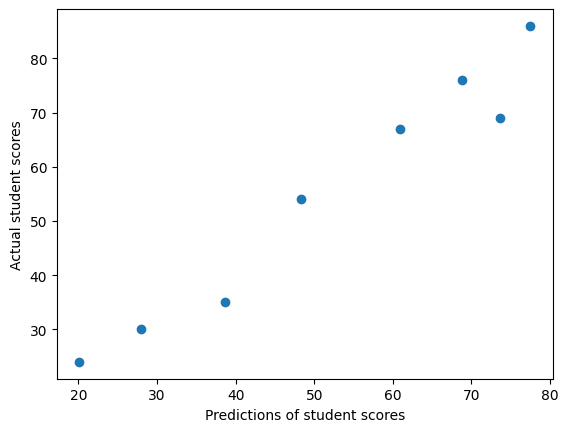

In [ ]:
plt.scatter(y_pred, y_test)
plt.xlabel('Predictions of student scores')
plt.ylabel('Actual student scores')